# VGG16 on BACH dataset


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import CSVLogger
import pandas as pd
from sklearn.metrics import classification_report
import os

## Data Wrangling and Preprocessing

In [4]:
train_dir = '/content/drive/MyDrive/BACHAugment'
test_dir = '/content/drive/MyDrive/BACHtest'

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= image_size,
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='categorical')

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= image_size,
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='categorical')

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator =test_datagen.flow_from_directory(test_dir,
                                                      target_size=image_size,
                                                          batch_size=batch_size,
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='categorical') # set as training data


Found 3368 images belonging to 4 classes.
Found 840 images belonging to 4 classes.
Found 103 images belonging to 4 classes.


## Modelling and Training

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's weights
base_model.trainable = True

# Add custom top layers for 4-class classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

optimizer = SGD(learning_rate=1e-3)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [7]:
csv_logger = CSVLogger('/content/drive/MyDrive/BACH-Results/VGG16/training_results1.csv')
# Train the model
history = model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[csv_logger])

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100
106/106 [==============================] - 961s 9s/step - loss: 1.3746 - accuracy: 0.3296 - val_loss: 1.3949 - val_accuracy: 0.3095
Epoch 2/100
106/106 [==============================] - 71s 670ms/step - loss: 1.2618 - accuracy: 0.4207 - val_loss: 1.2002 - val_accuracy: 0.4631
Epoch 3/100
106/106 [==============================] - 71s 668ms/step - loss: 1.1479 - accuracy: 0.5083 - val_loss: 1.1111 - val_accuracy: 0.4750
Epoch 4/100
106/106 [==============================] - 79s 747ms/step - loss: 1.0809 - accuracy: 0.5433 - val_loss: 0.9730 - val_accuracy: 0.5952
Epoch 5/100
106/106 [==============================] - 80s 750ms/step - loss: 0.9395 - accuracy: 0.6202 - val_loss: 1.2973 - val_accuracy: 0.4155
Epoch 6/100
106/106 [==============================] - 71s 664ms/step - loss: 0.9367 - accuracy: 0.6107 - val_loss: 0.8748 - val_accuracy: 0.6250
Epoch 7/100
106/106 [==============================] - 71s 664ms/step - loss: 0.8744 - accuracy: 0.6390 - val_loss: 0.7879 - v

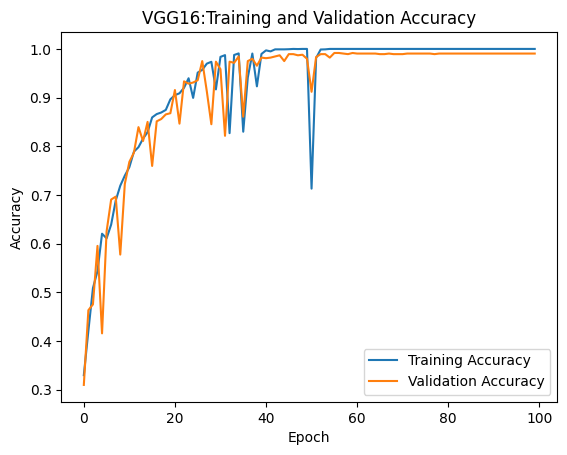

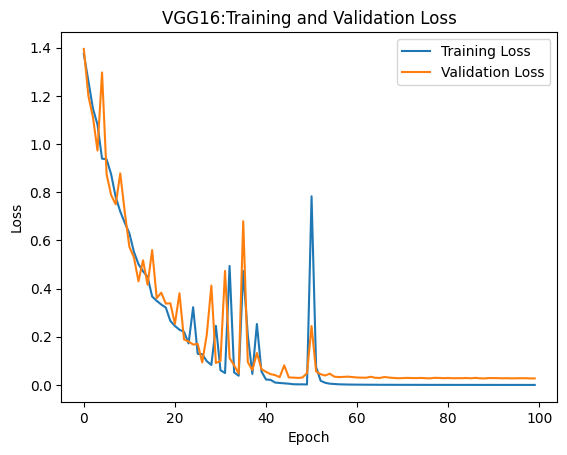

In [29]:
def plot_curves(history, save_dir):
    # Get training and validation accuracy
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create subdirectory for saving plots
    os.makedirs(save_dir, exist_ok=True)

    # Plot training and validation accuracy
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('VGG16:Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'accuracy.png'))
    plt.show()
    plt.close()

    # Plot training and validation loss
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('VGG16:Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'loss.png'))
    plt.show()
    plt.close()

plot_curves(history , '/content/drive/MyDrive/BACH-Results/VGG16')

## Saving and Loading

In [25]:
import pickle

# Save model weights
model.save_weights('/content/drive/MyDrive/BACH-Results/VGG16/BACH-VGG16.h5')

# Save training history
with open('/content/drive/MyDrive/BACH-Results/VGG16/vgg_16training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

## Evaluation


In [18]:
accuracy = model.evaluate(test_generator)[1]  # Index 1 corresponds to accuracy

print(f"Accuracy: {accuracy * 100:.2f}%")

4/4 [==============================] - 5s 1s/step - loss: 1.1650 - accuracy: 0.7864
Accuracy: 78.64%


In [19]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Convert predictions into labels (assuming one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Get the class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

4/4 [==============================] - 5s 1s/step


In [20]:
class_labels

['Benign', 'InSitu', 'Invasive', 'Normal']

CONFUSION MATRIX


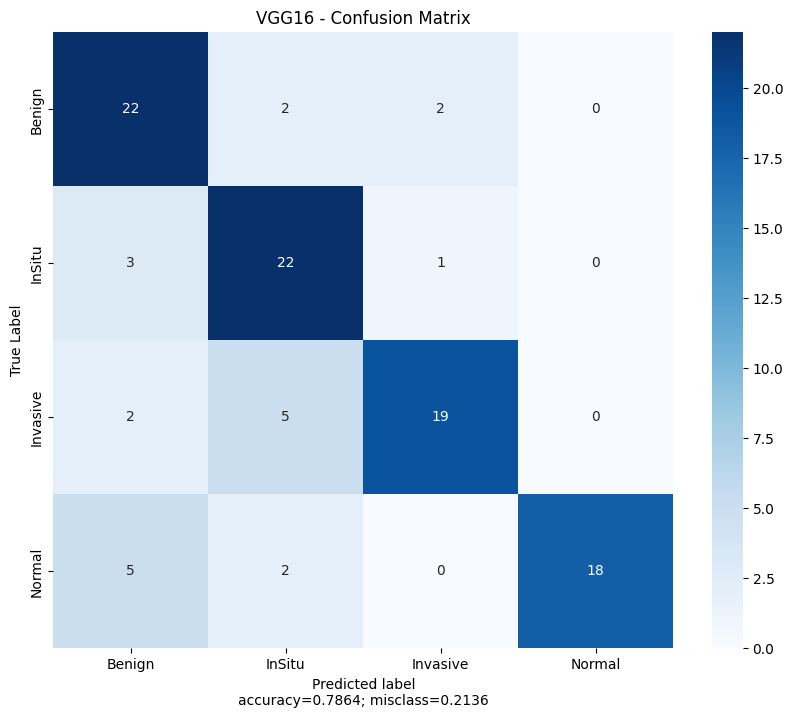

The details for confusion matrix is =
              precision    recall  f1-score   support

      Benign       0.69      0.85      0.76        26
      InSitu       0.71      0.85      0.77        26
    Invasive       0.86      0.73      0.79        26
      Normal       1.00      0.72      0.84        25

    accuracy                           0.79       103
   macro avg       0.82      0.79      0.79       103
weighted avg       0.81      0.79      0.79       103



In [52]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Benign','InSitu','Invasive','Normal'],
                           index =['Benign','InSitu','Invasive','Normal'])

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.title('VGG16 - Confusion Matrix')
plt.savefig('/content/drive/MyDrive/BACH-Results/VGG16/ConfusionMatrix')
plt.show()
target_names=['Benign','InSitu','Invasive','Normal']
print('The details for confusion matrix is =')
print (classification_report(true_labels, predicted_labels,target_names=target_names))


4/4 [==============================] - 3s 734ms/step


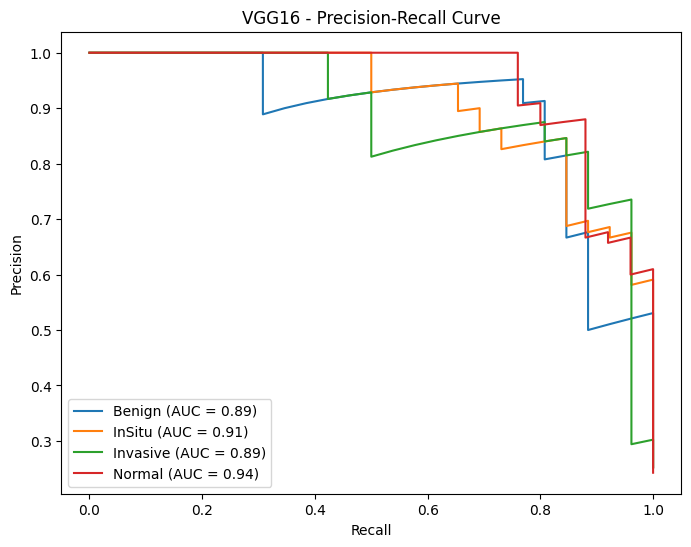

Benign: PR AUC = 0.89
InSitu: PR AUC = 0.91
Invasive: PR AUC = 0.89
Normal: PR AUC = 0.94


In [53]:
from sklearn.metrics import precision_recall_curve , auc
from tensorflow.keras.utils import to_categorical

def plot_precision_recall_curve(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = to_categorical(test_generator.labels)

    # Predict probabilities for each class using the model
    y_score = model.predict(test_generator)

    # Compute precision, recall, and thresholds for each class
    precision = dict()
    recall = dict()
    thresholds = dict()
    pr_auc = dict()

    for i, label in enumerate(class_labels):
        precision[label], recall[label], thresholds[label] = precision_recall_curve(
            y_true[:, i], y_score[:, i])
        pr_auc[label] = auc(recall[label], precision[label])

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))

    for label in class_labels:
        plt.plot(recall[label], precision[label], label=f'{label} (AUC = {pr_auc[label]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('VGG16 - Precision-Recall Curve')
    plt.legend()
    plt.savefig('/content/drive/MyDrive/BACH-Results/VGG16/VGG16 - Precision Recall Curve')
    plt.show()

    # Print precision-recall area for each class
    for label in class_labels:
        print(f'{label}: PR AUC = {pr_auc[label]:.2f}')

plot_precision_recall_curve(model , test_generator , class_labels)

4/4 [==============================] - 4s 873ms/step


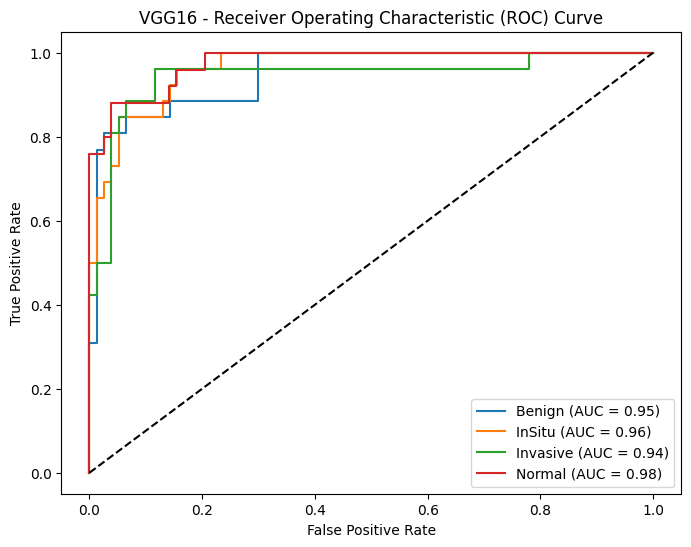

Benign: ROC AUC = 0.95
InSitu: ROC AUC = 0.96
Invasive: ROC AUC = 0.94
Normal: ROC AUC = 0.98


In [54]:
from sklearn.metrics import roc_curve
def plot_roc_curve(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = to_categorical(test_generator.labels)

    # Predict probabilities for each class using the model
    y_score = model.predict(test_generator)

    # Compute false positive rate, true positive rate, and thresholds for each class
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()

    for i, label in enumerate(class_labels):
        fpr[label], tpr[label], thresholds[label] = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[label] = auc(fpr[label], tpr[label])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))

    for label in class_labels:
        plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('VGG16 - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('/content/drive/MyDrive/BACH-Results/VGG16/VGG16 - ROC')
    plt.show()

    # Print ROC AUC for each class
    for label in class_labels:
        print(f'{label}: ROC AUC = {roc_auc[label]:.2f}')
plot_roc_curve(model , test_generator , class_labels)

In [47]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels , predicted_labels)

print(f'Kappa Value : {kappa}')

Kappa Value : 0.7149326959365958


4/4 [==============================] - 3s 743ms/step


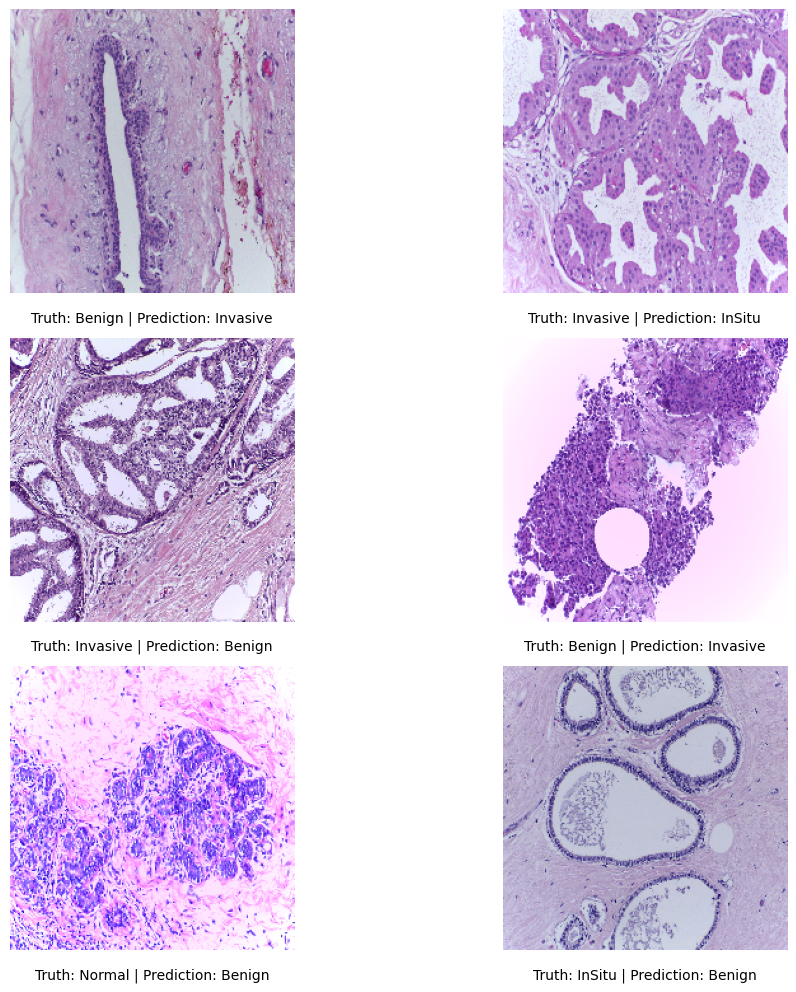

In [59]:
def plot_missclassified_imgs(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = test_generator.labels

    # Predict labels using the model
    y_pred = model.predict(test_generator).argmax(axis=1)

    # Find indices of misclassified images
    misclassified_indices = np.where(y_true != y_pred)[0]

    # Randomly select 6 misclassified images
    np.random.seed(42)
    selected_indices = np.random.choice(misclassified_indices, size=6, replace=False)

    # Set up the figure and axes
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    fig.tight_layout()

    # Plot the misclassified images
    for i, idx in enumerate(selected_indices):
        # Retrieve the image and label at the given index
        x, _ = test_generator.next()
        image = x[i]
        label_true = class_labels[y_true[idx]]
        label_pred = class_labels[y_pred[idx]]

        ax = axes[i // 2, i % 2]
        ax.imshow(image)
        ax.axis('off')
        ax.text(0.5, -0.1, f'Truth: {label_true} | Prediction: {label_pred}', transform=ax.transAxes, ha='center')
        # ax.text(0.5, -0.2, f'', transform=ax.transAxes, ha='center')
    plt.savefig('/content/drive/MyDrive/BACH-Results/VGG16/VGG16-MissclassifiedImages')
    plt.show()

plot_missclassified_imgs(model, test_generator, class_labels)

---